# LETS GROW MORE

# Data Science Internships(LGMVIP-OCT 2022)

# TASK 1(Intermediate level):Exploratory Data Analysis on Global Terrorism Data.

# By Subhodwip Chatterjee.

# LOADING THE REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
from collections import Counter

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding ='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,31,33,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3292,197510010004,1975,10,1,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2958,197504180001,1975,4,18,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
2445,197406190001,1974,6,19,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
937,197107170001,1971,7,17,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
2033,197309240002,1973,9,24,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
3454,197512180002,1975,12,18,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
948,197107300001,1971,7,30,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
5068,197707230001,1977,7,23,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,0.0,1.0,NaN
2300,197403240003,1974,3,24,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
4841,197706040005,1977,6,4,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,"197706040004, 197706040005, 197706040006, 1977..."


In [5]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
df.shape

(5096, 135)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
df.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5096 non-null   int64  
 1   Month        5096 non-null   int64  
 2   Day          5096 non-null   int64  
 3   Country      5096 non-null   object 
 4   Region       5096 non-null   object 
 5   City         5096 non-null   object 
 6   latitude     5006 non-null   float64
 7   longitude    5006 non-null   float64
 8   AttackType   5096 non-null   object 
 9   Killed       4484 non-null   float64
 10  Wounded      3308 non-null   float64
 11  Casualities  3294 non-null   float64
 12  Target       5039 non-null   object 
 13  Group        5095 non-null   object 
 14  Target_type  5095 non-null   object 
 15  Weapon_type  5095 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 637.1+ KB


# CHECKING MISSING DATA

In [10]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
City              0
latitude         90
longitude        90
AttackType        0
Killed          612
Wounded        1788
Casualities    1802
Target           57
Group             1
Target_type       1
Weapon_type       1
dtype: int64

# Removing the Missing data

In [11]:
df.dropna(axis=0, inplace=True)
df.shape

(3181, 16)

# Re-Checking for Missing Data

In [12]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

# DATA EXPLORATION

In [13]:
df.shape

(3181, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 5094
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3181 non-null   int64  
 1   Month        3181 non-null   int64  
 2   Day          3181 non-null   int64  
 3   Country      3181 non-null   object 
 4   Region       3181 non-null   object 
 5   City         3181 non-null   object 
 6   latitude     3181 non-null   float64
 7   longitude    3181 non-null   float64
 8   AttackType   3181 non-null   object 
 9   Killed       3181 non-null   float64
 10  Wounded      3181 non-null   float64
 11  Casualities  3181 non-null   float64
 12  Target       3181 non-null   object 
 13  Group        3181 non-null   object 
 14  Target_type  3181 non-null   object 
 15  Weapon_type  3181 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 422.5+ KB


In [15]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,3181.000000,3181.00000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,1973.760453,6.16127,15.125747,31.329888,-37.152403,0.439799,1.110971,1.550770
std,2.527799,3.28156,9.117571,23.030527,57.496221,3.089632,9.005132,10.121107
min,1970.000000,0.00000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1971.000000,3.00000,7.000000,33.606510,-80.052689,0.000000,0.000000,0.000000
50%,1974.000000,6.00000,15.000000,39.930771,-58.444435,0.000000,0.000000,0.000000
75%,1976.000000,9.00000,23.000000,42.811978,9.486855,0.000000,0.000000,1.000000
max,1977.000000,12.00000,31.000000,59.332788,172.636225,88.000000,285.000000,295.000000


In [16]:
df.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
Year,1.000000,-0.035526,-0.002145,0.057637,0.399761,0.024526,0.015646,0.021408
Month,-0.035526,1.000000,0.013647,-0.060486,0.064425,0.024204,0.037842,0.041058
Day,-0.002145,0.013647,1.000000,-0.039860,-0.002178,-0.018050,-0.016662,-0.020335
latitude,0.057637,-0.060486,-0.039860,1.000000,0.139895,-0.053884,0.028674,0.009063
longitude,0.399761,0.064425,-0.002178,0.139895,1.000000,0.067963,0.078495,0.090587
Killed,0.024526,0.024204,-0.018050,-0.053884,0.067963,1.000000,0.212033,0.493920
Wounded,0.015646,0.037842,-0.016662,0.028674,0.078495,0.212033,1.000000,0.954464
Casualities,0.021408,0.041058,-0.020335,0.009063,0.090587,0.493920,0.954464,1.000000


# Terrorist attack in each year

Text(0.5, 1.0, 'terrorist attack in each year')

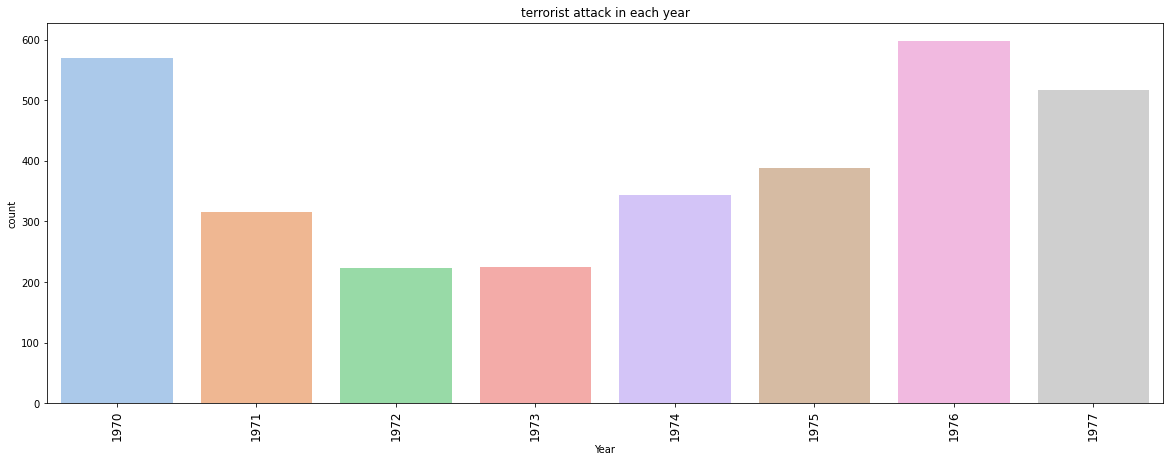

In [17]:
plt.subplots(figsize=(20,7))
sns.countplot(x='Year',data=df,palette='pastel')
plt.xticks(rotation=90,fontsize=12)
plt.title('terrorist attack in each year')

# From the above graph we see that most no of attacks happened in the year 2014 followed by 2015 and 2016.

# TERRORIST ACTIVITIES BY REGION  IN EACH YEAR.

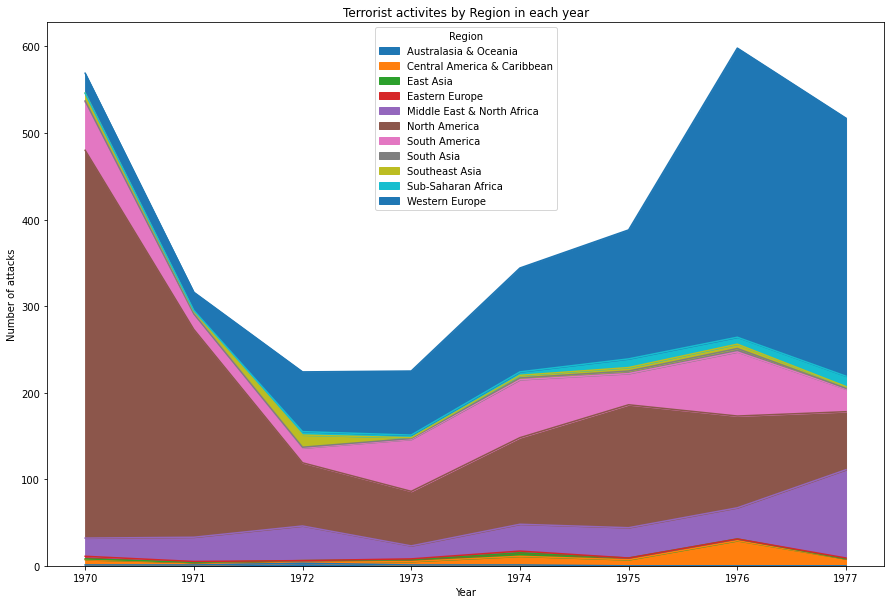

In [18]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,10))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

# Region affected by terrorist attack

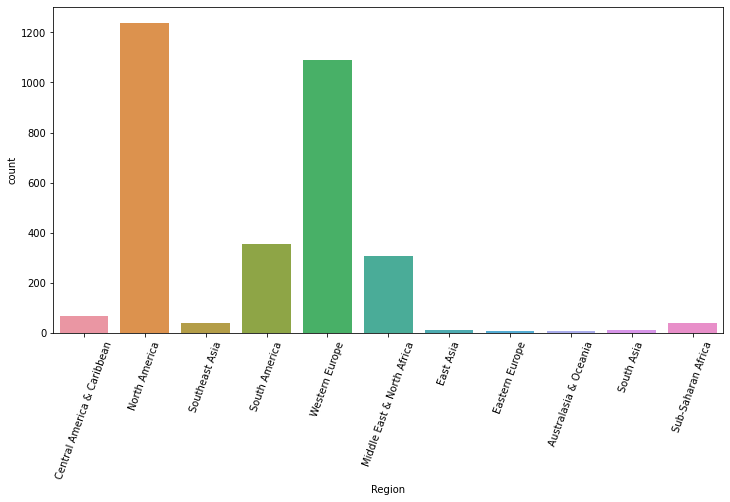

In [19]:
df['Region'].value_counts()
plt.figure(figsize=(12,6 ))
sns.countplot(x='Region',data=df)
plt.xticks(rotation=70)
plt.show()

# Middle East and North America is mostly affected by this following by South Africa.

# Top Countries affected by Terror Attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


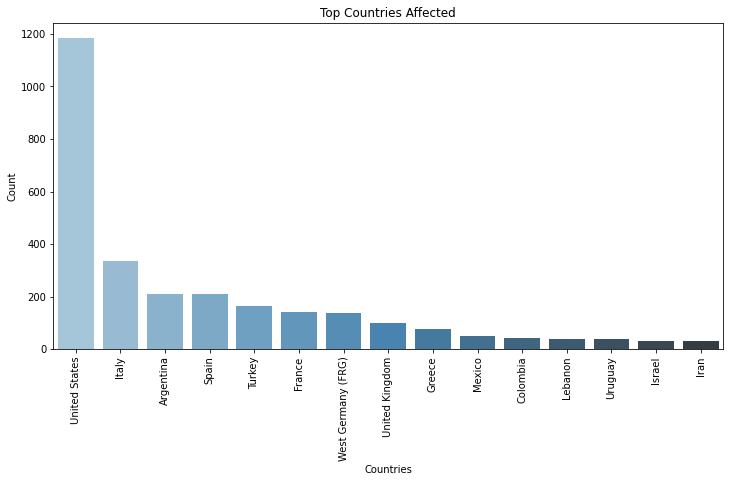

In [20]:
plt.subplots(figsize=(12,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Iraq shows the highest Terror Attacks followed by other Middle-east region.

# Counting  year wise casualities

In [21]:
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
px.bar(data_frame=year_cas,x = 'Year',y = 'Casualities',color='Casualities')

# It is observed that 2015 marks the highest Casualities records.

# Type of Target 

In [22]:
target = list(df['Target_type'])
target_map = dict(Counter(target))
target_df = pd.DataFrame(target_map.items())
target_df.columns = ['Target Type','Count']
px.bar(data_frame=target_df,x = 'Target Type',y = 'Count',color='Target Type')

# Private citizens and the property owner are mostly affected by this terror attack

# GROUP THAT DID MAX AMOUNT OF ATTACK

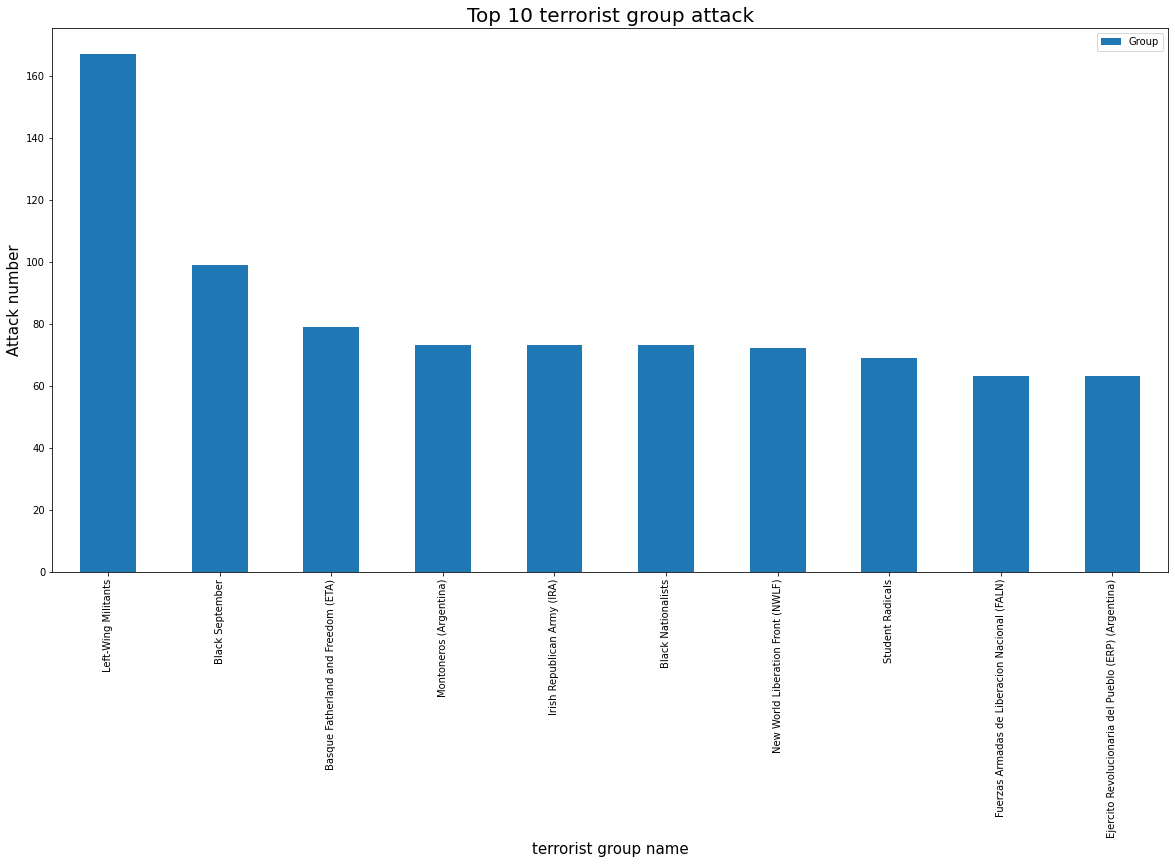

In [23]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [24]:
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


In [25]:
print("Most Attacked city:",df['City'].value_counts().idxmax())

Most Attacked city: New York City


# Conclusion from the above analysis
1)2014 was the year with most terror attacks.

2)Middle East and North Africa is the most affected region by terror attacks.

3)Iraq is the country with most terrorist attacks and Baghdad  in Iraq  is the mostly affected city.

4)India ranks 4th in the list of countries with most terrorist attacks.

5)Bombing/Explosion is the most used type of attacks.

6)Taliban is the terrorist organization with most claimed terror attacks.
